In [5]:
# !pip install mpl_finance
# !pip install python-binance
# !pip install pydeck
# !pip install streamlit
# !pip install ipywidgets
# !pip install tabulate
!pip install --upgrade mplfinance
# !pip install matplotlib.finance

In [2]:
from tabulate import tabulate
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
import random 
from matplotlib.dates import date2num
import datetime
import binance
import matplotlib.dates as mdates

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [114]:
def clear_data(data, filename='mcdonalds_expert.csv'):
    df = pd.DataFrame(pd.read_csv(data, delimiter=';', decimal=',',index_col=[1]))
    width, length = df.shape[0],df.shape[1]
    df_expert = df.copy()
    df_expert = df_expert.drop(df_expert.columns[[0,1,5,6,7,8,9,15,16,17,18,19]],axis=1)
    df_expert = df_expert.loc[~df_expert['Знакомы ли вы со старым меню Макдональдса?'].isin(['Нет'])]
    df_flavor = df_expert.iloc[:,3:8]
    df_quality = df_expert.iloc[:,8:13]
    width_flavor, length_flavor = df_flavor.shape[0],df_flavor.shape[1]
    main_list = []
    for i in range(width_flavor):
        inner_list=[
            (df_expert.iloc[i,0]/10)*df_flavor.iloc[i,0]+(df_quality.iloc[i,1]/10)*df_quality.iloc[i,0],
            (df_expert.iloc[i,0]/10)*df_flavor.iloc[i,1]+(df_quality.iloc[i,1]/10)*df_quality.iloc[i,1],
            (df_expert.iloc[i,0]/10)*df_flavor.iloc[i,2]+(df_quality.iloc[i,1]/10)*df_quality.iloc[i,2],
            (df_expert.iloc[i,0]/10)*df_flavor.iloc[i,3]+(df_quality.iloc[i,1]/10)*df_quality.iloc[i,3],
            (df_expert.iloc[i,0]/10)*df_flavor.iloc[i,4]+(df_quality.iloc[i,1]/10)*df_quality.iloc[i,4],
            ]
        main_list.append(inner_list)
    expert_df = pd.DataFrame(main_list, index=df.index, columns = ['Роял', 'Макчикен Премьер','Филе-о-фиш','Двойной Роял','Роял де Люкс',])
    expert_df = expert_df.T
    try:
        expert_df.to_csv(filename, sep=";", decimal=',',encoding='utf-8-sig')
    except PermissionError:
        print('Вы не закрыли файл!')

    df_rank = df.copy()
    df_rank = df_rank.drop(df_rank.columns[[0,1,10,11,12,13,14,20,21,22,23,24]],axis=1)
    df_rank = df_rank.loc[~df_rank['Знакомы ли вы со старым меню Макдональдса?'].isin(['Нет'])]
    df_flavor_rank = df_rank.iloc[:,3:8]
    df_quality_rank = df_rank.iloc[:,8:13]
    width_quality_rank, length_quality_rank = df_quality_rank.shape[0],df_quality_rank.shape[1]

    for i in range(width_quality_rank):
        s = 0 
        while s<=4:
            if df_flavor_rank.iloc[i,s] == '1 место':
                df_flavor_rank.iloc[i,s] = 1
            elif df_flavor_rank.iloc[i,s] == '2 место':
                df_flavor_rank.iloc[i,s] = 2
            elif df_flavor_rank.iloc[i,s] == '3 место':
                df_flavor_rank.iloc[i,s] = 3
            elif df_flavor_rank.iloc[i,s] == '4 место':
                df_flavor_rank.iloc[i,s] = 4
            elif df_flavor_rank.iloc[i,s] == '5 место':
                df_flavor_rank.iloc[i,s] = 5
            s+=1
    df_flavor_final = df_flavor_rank.T
    try:
        df_flavor_final.to_csv('flavor.csv', sep=';', decimal=',', encoding='utf-8-sig')
    except PermissionError:
        print('Вы не закрыли файл!')

    for i in range(width_quality_rank):
        k = 0 
        while k<=4:
            if df_quality_rank.iloc[i,k] == '1 место':
                df_quality_rank.iloc[i,k] = 1
            elif df_quality_rank.iloc[i,k] == '2 место':
                df_quality_rank.iloc[i,k] = 2
            elif df_quality_rank.iloc[i,k] == '3 место':
                df_quality_rank.iloc[i,k] = 3
            elif df_quality_rank.iloc[i,k] == '4 место':
                df_quality_rank.iloc[i,k] = 4
            elif df_quality_rank.iloc[i,k] == '5 место':
                df_quality_rank.iloc[i,k] = 5
            k+=1
    df_quality_final = df_quality_rank.T
    try:
        df_quality_final.to_csv('quality.csv', sep=';', decimal=',', encoding='utf-8-sig')
    except PermissionError:
        print('Вы не закрыли файл!')
    print('''Названия ваших файлов: 
                    для экспертных вычислений: "mcdonalds_expert.csv", 
                    для ранговых вычислений по вкусу: "flavor.csv", 
                    для ранговых вычислений по качеству: "quality.csv"''')
    list_names = ['mcdonalds_expert.csv', "flavor.csv", "quality.csv"]
    return(df_flavor_final)

class expert_evaluations():
    '''
    документация
        '''

    def run():
        e = expert_evaluations()
        calculating = int(input('''Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
              3) Обработка данных по старому меню McDonald's 
                  '''))
        if calculating == 1:
            file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')
            e.expert(file)
        elif calculating == 2:
            file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')
            e.rank(file)
        elif calculating== 3:
            file = input('''Введите название CSV-файла с неочищенными данными "name.csv", дорогой пользователь:\n\n''')
            clear_data(file)
            dec = int(input('''Введите каким решением хотите воспользоваться очищенных файлов:
              1) Математическая обработочка экспертных оценочек меню McDonald's
              2) Математическая обработочка ранговых оценочек вкуса меню McDonald's
              3) Математическая обработочка ранговых оценочек качества меню McDonald's'''))
                            
            if dec == 1:
                e.expert('mcdonalds_expert.csv')
            elif dec == 2:
                e.rank('flavor.csv')
            elif dec == 3:
                e.rank('quality.csv')
            
        continue_ = input('Хотите ли вы продолжить дорожайший пользователь?\n(Да или нет)\n')
        continue_ = continue_.lower()
        index = continue_.find('да')
        if index != -1:
            expert_evaluations.run()

    def expert(self, data):
        df = pd.DataFrame(pd.read_csv(data, delimiter=';', index_col=[0], decimal=','))
        width, length = df.shape[0], df.shape[1]
        square_list = []
        for i, row in df.iterrows():
            square_list.append(row.map(lambda x:x**2))
        square_df = pd.DataFrame(square_list) # датафрейм квадратов

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index, columns =['Матожидание']) # столбец матожидания
        print('Математическое ожидание продукта:\n', tabulate(mean_df, headers = 'keys', tablefmt = 'psql'))
        
        variance_list = []
        for i, row in df.iterrows():
            variance_list.append(row.var())
        variance_df = pd.DataFrame(variance_list) # столбец дисперсии "дисп.в"

        sum_squre_list = []
        for i, row in square_df.iterrows():
                sum_squre_list.append(row.mean())
        sum_squre_df = pd.DataFrame(sum_squre_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) #столбец квадрат суммы

        general_variance_list = []
        for i in range(len(sum_squre_list)):
            general_variance_list.append(sum_squre_list[i]-square_sum_list[i])
        general_variance_df = pd.DataFrame(general_variance_list, index = df.index, columns = ['Дисперсия']) #столбце дисперсий "дисп.г", полученные по формулам
        print('Дисперсия по продукту:\n', tabulate(general_variance_df, headers = 'keys', tablefmt = 'psql'))
        
        standart_deviation_general_list = []
        for i in general_variance_list:
            standart_deviation_general_list.append(i**0.5)
        standart_deviation_general_df = pd.DataFrame(standart_deviation_general_list, index=df.index, columns=['Sigma'])  #столбец стандартного отклонения "x1" 
                                                                            #(от генеральной совокупности найденного по формулам)
        print('Среднеквадратичное отклонение по продукту:\n', tabulate(standart_deviation_general_df, headers = 'keys', tablefmt = 'psql'))

        standart_deviation_sampled_list = []
        for i in variance_list:
            standart_deviation_sampled_list.append(i**0.5)
        standart_deviation_sampled_df = pd.DataFrame(standart_deviation_sampled_list) #столбец стандартного отклонения "x2" 
                                                                            #(от выборки)

        left_margin = [mean_list[i] - (standart_deviation_general_list[i]*2) for i in range(len(mean_list))]
        right_margin = [mean_list[i] + (standart_deviation_general_list[i]*2) for i in range(len(mean_list))]

        confidence_intervals = [left_margin, right_margin]
        confidence_intervals_df = pd.DataFrame(confidence_intervals, index = ['Левый','Правый'], columns=df.index).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x1"
        print('Доверительные интервалы :\n', tabulate(confidence_intervals_df, headers = 'keys', tablefmt = 'psql'))

        left_margin_x2 = [mean_list[i] - standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        right_margin_x2 = [mean_list[i] + standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        confidence_intervals_x2 = [left_margin_x2, right_margin_x2]
        confidence_intervals_df_x2 = pd.DataFrame(confidence_intervals_x2).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x2"
        left_mean = [i *0.99 for i in mean_list]
        right_mean = [i *1.01 for i in mean_list]
        diagramm_list = np.array([left_margin, right_margin, left_mean, right_mean]).T.tolist()

        data=[]
        for i in range(len(diagramm_list)):    
            diagramm_data=[i for i in diagramm_list[i]]
            sorted_data=sorted(diagramm_data)
            one=(i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2])
            data.append(one)
        fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
        fig.subplots_adjust(bottom=0)
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
        plt.xticks(rotation=30)
        plt.title('Биржевая диаграмма')
        plt.xlabel('Продукты')
        plt.ylabel('Балл')
        candlestick_ohlc(ax,data,width=0.9,colorup='blue',colordown='blue',alpha=0.6) 
        plt.grid()
        plt.show()

        return()
    def rank(self, data):
        df = pd.DataFrame(pd.read_csv(data, delimiter=';', index_col=[0], decimal=','))
        width, length = df.shape[0], df.shape[1]

        mediana_list = []
        for i, row in df.iterrows():
            mediana_list.append(row.median())
        mediana_df = pd.DataFrame(mediana_list, index = df.index, columns=['Медиана']) # столбец медианы
        print('Медиана по продуктам:\n', tabulate(mediana_df, headers = 'keys', tablefmt = 'psql'))

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index) # столбец матожидания

        square_list=[]
        for i in range(len(mediana_list)):
            square_list.append(list(df.iloc[i].map(lambda x: (x-mean_list[i])**2)))
        square_df = pd.DataFrame(square_list) # датафрейм из (x - E)^2 

        sum_square_list=[]
        for i in range(length):
            sum_square_list.append(square_df.iloc[:,i].sum()) # сумма квадратов разностей x и матожидания
        

        standart_deviation_list=[]
        for i in range(len(sum_square_list)):
            standart_deviation_list.append(sum_square_list[i]/(len(df.iloc[:,i])-1))
        standart_deviation_df = pd.DataFrame(standart_deviation_list) # список стандартных отклонений

        divide_by_one_list=[]
        for i in standart_deviation_list:
            divide_by_one_list.append(1/i)
        divide_by_one_df = pd.DataFrame(divide_by_one_list) # 1/D в экселе (1 делить на стандартное отклонение)

        sum_divided_std = sum(divide_by_one_list) # сумма разделенных на 1 чисел        
        expert_competence_ratios = [i/sum_divided_std for i in divide_by_one_list] #КОЭФФИЦИЕНТЫ КОМПEТЕНТНОСТИ ЭКСПЕРТОВ

        ratios = ["{:.2%}".format(i) for i in expert_competence_ratios]
        expert_competence_ratios_df = pd.DataFrame(ratios, index= df.columns, columns =['Коэффициенты'])
        print('Коэффициенты компетентности экспертов:\n', tabulate(expert_competence_ratios_df, headers = 'keys', tablefmt = 'psql'))

        df_list=[]
        for i in range(len(expert_competence_ratios)):
            df_list.append(df.iloc[:,i].tolist()) #неважная часть, облистывание главного датасета

        multiply_weighted_average_ranks_list=[]
        for i in range(len(df_list)):
            inner_list=[]
            for e in df_list[i]:
                inner_list.append(expert_competence_ratios[i]*e)
            multiply_weighted_average_ranks_list.append(inner_list)
        multiply_weighted_average_ranks_df = pd.DataFrame(multiply_weighted_average_ranks_list) #произведения коэффициентов на датасет

        weighted_average_ranks = []
        for i in range(width):
            weighted_average_ranks.append(multiply_weighted_average_ranks_df.iloc[:,i].sum())
        weighted_average_ranks_df = pd.DataFrame(weighted_average_ranks, index = df.index, columns=['Ранги'])#средневзвешанные ранги
        print('Cредневзвешенные ранги по продуктам:\n', tabulate(weighted_average_ranks_df, headers = 'keys', tablefmt = 'psql'))

        return('Обработка завершена!')

Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
              3) Обработка данных по старому меню McDonald's 
                  3
Введите название CSV-файла с неочищенными данными "name.csv", дорогой пользователь:

helpp.csv
Названия ваших файлов: 
                    для экспертных вычислений: "mcdonalds_expert.csv", 
                    для ранговых вычислений по вкусу: "flavor.csv", 
                    для ранговых вычислений по качеству: "quality.csv"
Введите каким решением хотите воспользоваться очищенных файлов:
              1) Математическая обработочка экспертных оценочек меню McDonald's
              2) Математическая обработочка ранговых оценочек вкуса меню McDonald's
              3) Математическая обработочка ранговых оценочек качества меню McDonald's1
Математическое ожидание продукта:
 +------------------+---------------+
|                  |   Мат

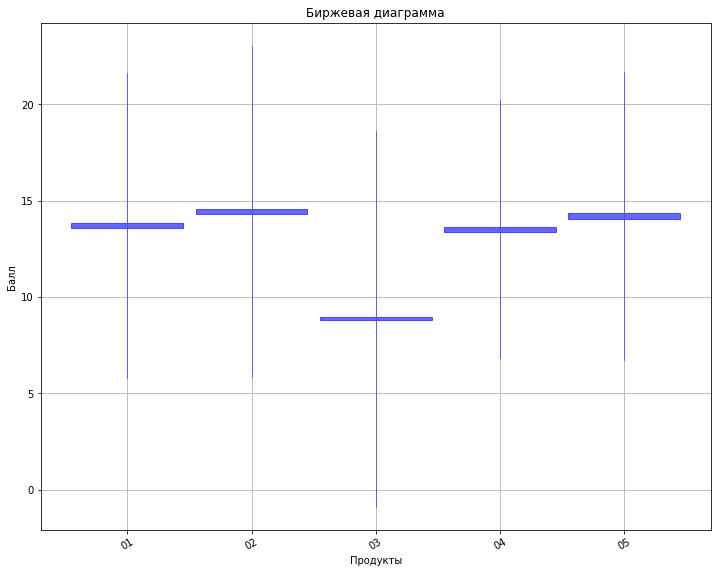

Хотите ли вы продолжить дорожайший пользователь?
(Да или нет)
конечно же да
Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
              3) Обработка данных по старому меню McDonald's 
                  3
Введите название CSV-файла с неочищенными данными "name.csv", дорогой пользователь:

helpp.csv
Названия ваших файлов: 
                    для экспертных вычислений: "mcdonalds_expert.csv", 
                    для ранговых вычислений по вкусу: "flavor.csv", 
                    для ранговых вычислений по качеству: "quality.csv"
Введите каким решением хотите воспользоваться очищенных файлов:
              1) Математическая обработочка экспертных оценочек меню McDonald's
              2) Математическая обработочка ранговых оценочек вкуса меню McDonald's
              3) Математическая обработочка ранговых оценочек качества меню McDonald's2
Медиана по продуктам:


Хотите ли вы продолжить дорожайший пользователь?
(Да или нет)
нет


In [120]:
try:
    expert_evaluations.run() #ДЛЯ РАБОТЫ ЗАПУСТИТЬ ЭТУ ЧАСТЬ КОДА
except:
    print('Что-то пошло не так. Запустите код заново<3<3<3')